In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Iris Dataset Sepal Length vs Width')

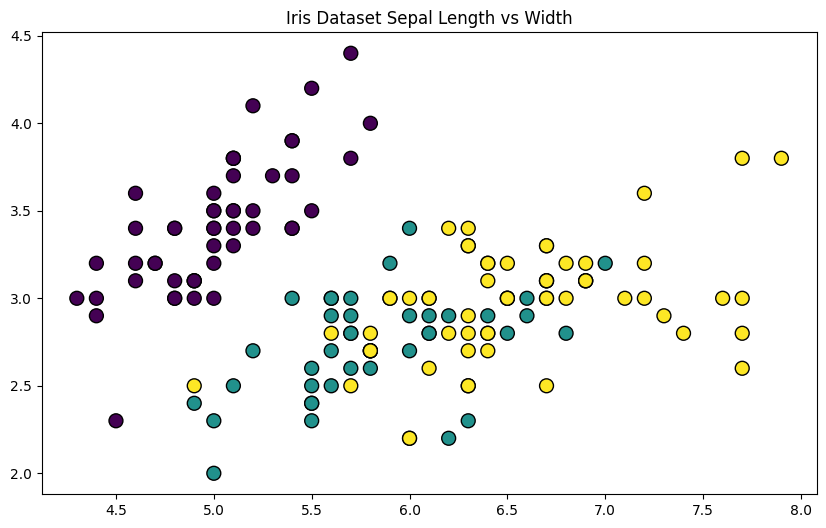

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=iris['Species'].astype('category').cat.codes, cmap='viridis', edgecolor='k', s=100)
plt.title('Iris Dataset Sepal Length vs Width')

Text(0.5, 1.0, 'Iris Dataset Petal Length vs Width')

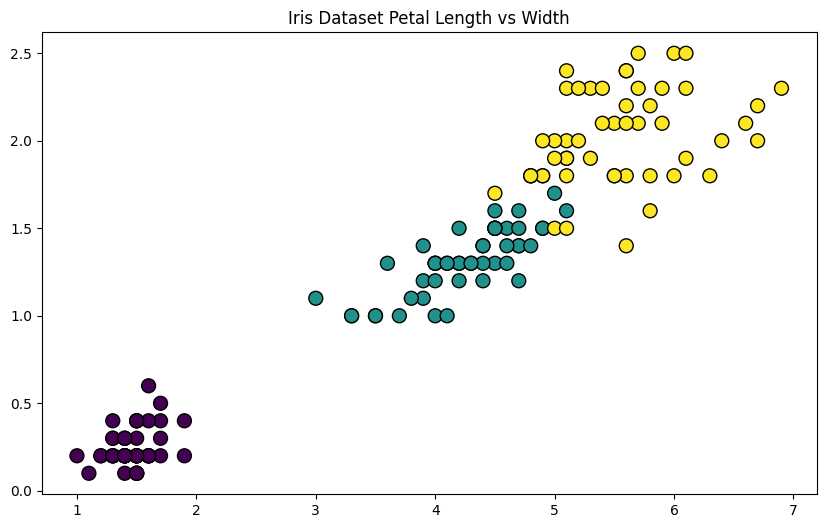

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c=iris['Species'].astype('category').cat.codes, cmap='viridis', edgecolor='k', s=100)
plt.title('Iris Dataset Petal Length vs Width')

In [6]:
x = iris.drop("Species", axis=1)
y = iris["Species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=65)

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
RFC.score(x_test, y_test)


1.0

In [8]:
RFC.score(x_train, y_train)

1.0

In [9]:
RFC.predict_proba(x_test)

array([[0.  , 0.04, 0.96],
       [0.  , 0.95, 0.05],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.81, 0.19],
       [1.  , 0.  , 0.  ],
       [0.  , 0.97, 0.03],
       [0.  , 0.69, 0.31],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.16, 0.84],
       [0.  , 0.1 , 0.9 ],
       [0.  , 0.94, 0.06],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.08, 0.92],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [10]:
pred = RFC.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]


Text(0.5, 47.7222222222222, 'Predicted')

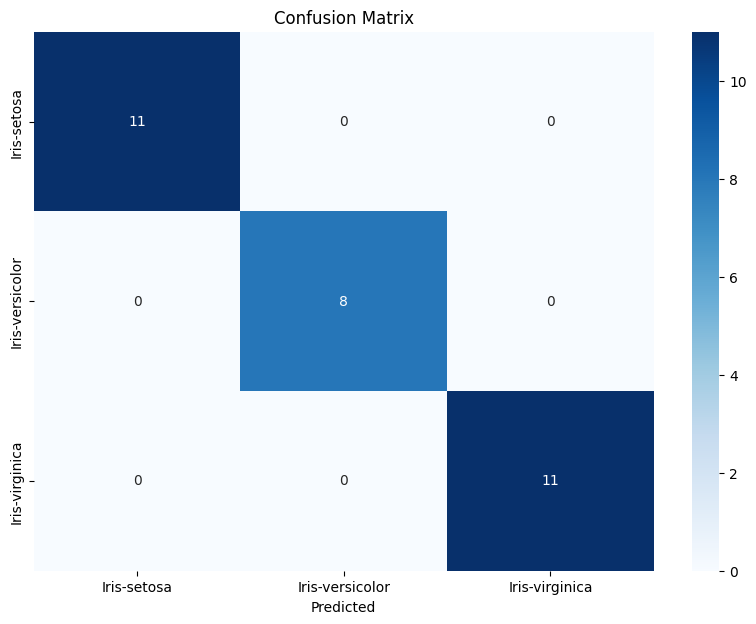

In [11]:
import seaborn as sns

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')